# Herkenning van handgeschreven cijfers met Deep Learning 2

## Convolutionele Neurale Netwerken

Stijn Oomes

donderdag 15 september 2022

## Importeer libraries

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from tensorflow.keras.utils import to_categorical
from keras import models, layers

from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D

## Verover de data

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

## Prepareer de images

* normalizeren --> pixel waardes tussen 0.0 en 1.0
* reshapen --> extra dimensie!

In [5]:
train_images_normalized = train_images.astype('float32')/255

In [6]:
train_images_enhanced = train_images_normalized.reshape(60000,28,28,1)

In [7]:
train_images_enhanced.shape

(60000, 28, 28, 1)

Doe hetzelfde met de test images:

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
test_images_normalized = test_images.astype('float32')/255

In [10]:
test_images_enhanced  = test_images_normalized.reshape(10000, 28, 28, 1)

In [11]:
test_images_enhanced.shape

(10000, 28, 28, 1)

## Prepareer de labels

**OPDRACHT**: introduceer "one-hot encoding" voor de labels (zowel train set als de test set)

In [12]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
train_labels_encoded = to_categorical(train_labels)
test_labels_encoded = to_categorical(test_labels)

In [14]:
train_labels_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
test_labels_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Definieeer netwerk / model

**OPDRACHT**: voeg nog 1 convolutie laag en nog 1 volledig verbonden ("Dense") laag toe

In [32]:
cnn = models.Sequential()

cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn.add(AveragePooling2D())

cnn.add(Conv2D(filters=64, kernel_size=(4, 4), activation='sigmoid'))
cnn.add(AveragePooling2D())

cnn.add(Flatten())
cnn.add(Dropout(0.5))

cnn.add(Dense(units=64, activation='relu'))
cnn.add(Dense(units=10, activation = 'softmax'))

In [33]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 average_pooling2d_3 (Averag  (None, 13, 13, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        32832     
                                                                 
 average_pooling2d_4 (Averag  (None, 5, 5, 64)         0         
 ePooling2D)                                                     
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1600)             

In [34]:
cnn.compile(optimizer='adam',
            metrics = ['accuracy'],
            loss = 'categorical_crossentropy')

**OPDRACHT**: meet hoe lang het trainen duurt, niet met %%timeit maar met time.time().


In [35]:
import time

# noteer de huidige tijd voor het uitvoeren van de code
start_time = time.time()

history_cnn = cnn.fit(train_images_enhanced,
        train_labels_encoded,
        epochs = 3, # varieer het aantal epochs
        batch_size = 128,
        validation_data = (test_images_enhanced, test_labels_encoded))

# noteer de huidige tijd na het uitvoeren van de code
end_time = time.time()

# bereken de totale uitvoeringstijd
total_time = end_time - start_time

# print de totale uitvoeringstijd
print("De totale uitvoeringstijd van trainen was:", total_time, "seconden.")

Epoch 1/3
469/469 [==============================] - 15s 31ms/step - loss: 0.9110 - accuracy: 0.6830 - val_loss: 0.2006 - val_accuracy: 0.9434
Epoch 2/3
469/469 [==============================] - 15s 32ms/step - loss: 0.2024 - accuracy: 0.9393 - val_loss: 0.1207 - val_accuracy: 0.9629
Epoch 3/3
469/469 [==============================] - 15s 32ms/step - loss: 0.1451 - accuracy: 0.9564 - val_loss: 0.0853 - val_accuracy: 0.9750
De totale uitvoeringstijd van trainen was: 45.19728493690491 seconden.


**OPDRACHT**: meet hoe lang het testen duurt, niet met %%timeit maar met time.time().

In [36]:
import time

start_time = time.time()

loss, acc = cnn.evaluate(test_images_enhanced,
                         test_labels_encoded)
end_time = time.time()

total_time = end_time - start_time

print(f"De nauwkeurigheid was: {acc}")
print("De totale uitvoeringstijd van testen was:", total_time, "seconden.")

313/313 [==============================] - 1s 3ms/step - loss: 0.0853 - accuracy: 0.9750
De nauwkeurigheid was: 0.9750000238418579
De totale uitvoeringstijd van testen was: 1.103806734085083 seconden.


**OPDRACHT**: voeg labels aan deze grafiek toe

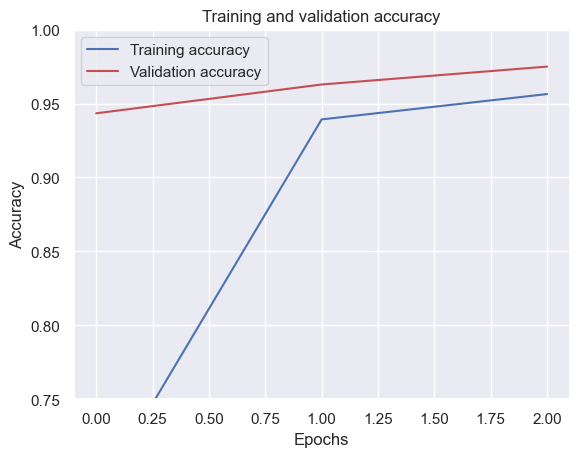

In [39]:
plt.plot(history_cnn.history['accuracy'], label='Training accuracy')
plt.plot(history_cnn.history['val_accuracy'],'r', label='Validation accuracy')
plt.ylim(0.75,1.0)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**OPDRACHT**: evalueer je resultaten:

* hoe is de nauwkeurigheid? 
    - Ik zelf vind dat de nauwkeurigheid best wel goed is, namelijk 97.50%.
* is het netwerk onder- of over-trained?
    - Het netwerk is ondergetrained, dat kunnen we zien aan de grafiek dat het netwerk niet genoeg heeft geleerd van de trainingsgegevens.
* laat een paar fouten zien
 * wat kun je zeggen over de aard van de fouten?
* wat is sneller: het trainen of het testen?
    - Aan de hand van de timer die terug te zien is in dit bestand, zien we dat het testen veel snelle is. Het duurde namelijk maar 1.1 sec.
* wat kun je nog doen om de nauwkeurigheid te verhogen?
    - Meerdere lagen toevoegen, het activiatiefuncties varieren, de epochs, batch_sizes enz....
(noteer de veranderingen die je hebt aangebracht en wat daar de resultaten van zijn)
    - Ik had eerst vergeten om een tweede averagepool toe te voegen, de resultaten waren echt te laag. 
    - Ik heb activiatiefuncties gevarieerd.

## Evalueer cijferherkenning met kNN, NN, en CNN

**OPDRACHT**: evalueer je resultaten:

vergelijk de resultaten van kNN, NN, en CNN

* wat concludeer je hieruit?
* welke type fouten maken de verschillende classifiers?




* Het resultaat van de Convolutional Neural Network (CNN) was hoger (0.975) dan het resultaat van de K-Nearest Neighbors (KNN) classifier (0.9691). Dit suggereert dat de CNN beter presteert dan de KNN classifier op de gegeven dataset.

* KNN kan fouten maken als gevolg van de nabijheid van handgeschreven cijfers die op elkaar lijken, zoals een 4 en een 9, of een 1 en een 7. Dit kan leiden tot classificatiefouten als de KNN-classifier de verkeerde klasse kiest vanwege de nabijheid van datapunten.

* CNN kan fouten maken als het model onvoldoende variatie in de trainingsgegevens heeft waardoor het moeilijk wordt om nieuwe, ongeziene voorbeelden correct te classificeren.